# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf


# Data Collection

In [2]:
symbol='AXISBANK.NS'
start=dt.datetime(2021,7,1)
end=dt.datetime(2022,1,28)
stk_data=yf.download(symbol,start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060
2022-01-24,715.000000,716.400024,688.200012,704.599976,702.811890,8812501


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [5]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000
2022-01-24,715.000000,716.400024,688.200012,704.599976


# Data Preprocessing

In [6]:

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data)
print("Length : ",data1.shape)


Length :  (144, 4)


In [7]:
data1

array([[0.50898197, 0.44154881, 0.54381512, 0.49149503],
       [0.49700581, 0.43385435, 0.54099743, 0.51314458],
       [0.54441099, 0.47927516, 0.59397023, 0.56314433],
       [0.54391211, 0.50409522, 0.60411386, 0.55283505],
       [0.53842321, 0.48920319, 0.58748939, 0.57628891],
       [0.55888217, 0.50483994, 0.58439   , 0.53247448],
       [0.51896201, 0.43410279, 0.51986471, 0.49613402],
       [0.52145702, 0.45842626, 0.56522953, 0.52835052],
       [0.55389215, 0.53387928, 0.60298672, 0.6167527 ],
       [0.61352294, 0.53611315, 0.65370522, 0.61314439],
       [0.61127737, 0.55994034, 0.6677937 , 0.6342786 ],
       [0.63872248, 0.54877131, 0.6680754 , 0.61881468],
       [0.52045896, 0.50235794, 0.57255547, 0.53659813],
       [0.53393207, 0.44551995, 0.54212457, 0.48788672],
       [0.50948085, 0.46190113, 0.52409126, 0.49304136],
       [0.50399195, 0.48920319, 0.51901927, 0.53762912],
       [0.52894205, 0.46934714, 0.54663282, 0.5422681 ],
       [0.51147698, 0.4494911 ,

# Creating dataframe for processed values

In [8]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])

In [9]:
data1.shape

(144, 4)

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# creating dictionary to store values
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]} 

# creating list
listt=["Close","High","Open","Low"]

In [12]:
print(listt)

['Close', 'High', 'Open', 'Low']


In [13]:
performance

{'Model': [], 'RMSE': [], 'MaPe': [], 'Lag': [], 'Test': []}

In [14]:
datasetTwo=data1[listt]
datasetTwo

,Close,High,Open,Low
0,0.491495,0.441549,0.508982,0.543815
1,0.513145,0.433854,0.497006,0.540997
2,0.563144,0.479275,0.544411,0.593970
3,0.552835,0.504095,0.543912,0.604114
4,0.576289,0.489203,0.538423,0.587489
...,...,...,...,...
139,0.401031,0.355920,0.414421,0.417864
140,0.316495,0.296848,0.369261,0.338405
141,0.275773,0.252916,0.334331,0.226543
142,0.521134,0.444527,0.329341,0.341504


# Train and test Split

In [15]:
test_obs=28
train=datasetTwo[:-test_obs]
test=datasetTwo[-test_obs:]

# Model creation and Forecasting

In [29]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


def combination(dataset, listt):
    print(listt)
    datasetTwo = dataset[listt]
    test_obs = 28
    train = datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]

    # Initialize lists to store performance metrics
    rmse_list = []
    mape_list = []
    lag_list = []

    for p in range(1, 6):  # Iterate over different autoregressive orders
        for q in range(1, 4):  # Iterate over different moving average orders
            try:
                model = VARMAX(train, order=(p, q))  # VARMA model
                result = model.fit(maxiter=1000, disp=False)

                print('Order = (p={}, q={})'.format(p, q))
                print('AIC: ', result.aic)
                print('BIC: ', result.bic)
                print()

                # Forecast
                pred = result.forecast(steps=28)

                # Calculate performance metrics
                rmse = round(mean_squared_error(test, pred, squared=False))
                mape = mean_absolute_percentage_error(test, pred)

                # Append metrics to lists
                rmse_list.append(rmse)
                mape_list.append(mape)
                lag_list.append((p, q))
            except Exception as e:
                print(f"Error fitting model for order (p={p}, q={q}): {e}")

    # Check if rmse_list is empty
    if not rmse_list:
        print("No suitable models found.")
        return None, None, None

    
    # Find the best performing model based on RMSE
    min_rmse_index = rmse_list.index(min(rmse_list))
    best_lag = lag_list[min_rmse_index]
    best_rmse = rmse_list[min_rmse_index]
    best_mape = mape_list[min_rmse_index]

    print('Best Model (based on RMSE):')
    print('Order (p, q):', best_lag)
    print('RMSE:', best_rmse)
    print('MAPE:', best_mape)

    # Fit the best model
    best_model = VARMAX(train, order=best_lag)
    best_result = best_model.fit(maxiter=1000, disp=False)

    # Forecast using the best model
    best_pred = best_result.forecast(steps=28)

    # Save forecast to CSV
    preds = pd.DataFrame(best_pred, columns=listt)
    #preds.to_csv("varma_forecasted_{}.csv".format(test_obs))

    # Create DataFrame to store performance metrics
    performance = pd.DataFrame({
        'Model': [listt],
        'RMSE': [best_rmse],
        'MAPE': [best_mape],
        'Lag': [best_lag],
        'Test': [test_obs]
    })

    return performance, best_result, best_pred


In [30]:
perf,best_res,best_pre=combination(data1, listt)

['Close', 'High', 'Open', 'Low']


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=1, q=1)
AIC:  -1893.9271224753036
BIC:  -1767.2619736844108



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=1, q=2)
AIC:  -1899.2379812015947
BIC:  -1728.515389353



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=1, q=3)
AIC:  -1878.5213590650578
BIC:  -1663.7413241587615



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=2, q=1)
AIC:  -1904.9649344951054
BIC:  -1734.2423426465107



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=2, q=2)
AIC:  -1876.5831601681593
BIC:  -1661.803125261863



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=2, q=3)
AIC:  -1855.4522336819498
BIC:  -1596.6147557179515



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=3, q=1)
AIC:  -1888.3014835744982
BIC:  -1673.5214486682019



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=3, q=2)
AIC:  -1857.49600482907
BIC:  -1598.6585268650717



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Order = (p=3, q=3)
AIC:  -1827.0465387875838
BIC:  -1524.1516177658837



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=4, q=1)
AIC:  -1868.672034117536
BIC:  -1609.8345561535377



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=4, q=2)
AIC:  -1836.6255014512612
BIC:  -1533.730580429561



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order = (p=4, q=3)
AIC:  -1806.7175370083091
BIC:  -1459.7651729289073



C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Error fitting model for order (p=5, q=1): Schur decomposition solver error.


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Error fitting model for order (p=5, q=2): Schur decomposition solver error.


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Error fitting model for order (p=5, q=3): Schur decomposition solver error.
Best Model (based on RMSE):
Order (p, q): (1, 1)
RMSE: 0
MAPE: 0.6302594382526286


C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
perf

,Model,RMSE,MAPE,Lag,Test
0,"[Close, High, Open, Low]",0,0.630259,"(1, 1)",28


In [32]:
best_res

In [33]:
best_pre

,Close,High,Open,Low
116,0.173516,0.151974,0.209784,0.169809
117,0.179680,0.141501,0.191766,0.170786
118,0.192440,0.148776,0.197805,0.186851
119,0.207690,0.161496,0.210024,0.203941
120,0.223478,0.176228,0.224695,0.221287
121,0.239001,0.191322,0.239898,0.238156
122,0.253928,0.206097,0.254852,0.254305
123,0.268143,0.220278,0.269236,0.269652
124,0.281617,0.233770,0.282934,0.284185
125,0.294364,0.246555,0.295920,0.297927


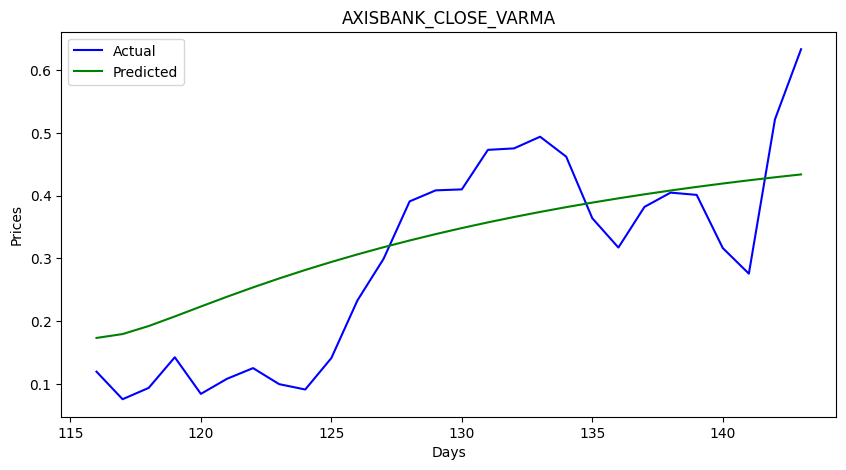

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test['Close'], color = 'blue', label="Actual")
plt.plot(best_pre['Close'], color = 'green', label ="Predicted")
plt.title("AXISBANK_CLOSE_VARMA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [45]:
forecast = best_res.predict(start=len(data1), end=len(data1) + 3, exog=test[:4])
forecast

,Close,High,Open,Low
144,0.437881,0.390700,0.442380,0.452598
145,0.441935,0.394772,0.446518,0.456967
146,0.445763,0.398617,0.450424,0.461092
147,0.449377,0.402248,0.454113,0.464987
